## ___Linear Discriminant Analysis (LDA)___

_Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs._

_Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is commonly used for the supervised classification problems. It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space._

_For example, we have two classes and we need to separate them efficiently. Classes can have multiple features. Using only a single feature to classify them may result in some overlapping as shown in the below figure. So, we will keep on increasing the number of features for proper classification._

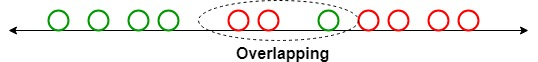

___Example:___
_Suppose we have two sets of data points belonging to two different classes that we want to classify. As shown in the given 2D graph, when the data points are plotted on the 2D plane, there’s no straight line that can separate the two classes of the data points completely. Hence, in this case, LDA (Linear Discriminant Analysis) is used which reduces the 2D graph into a 1D graph in order to maximize the separability between the two classes._

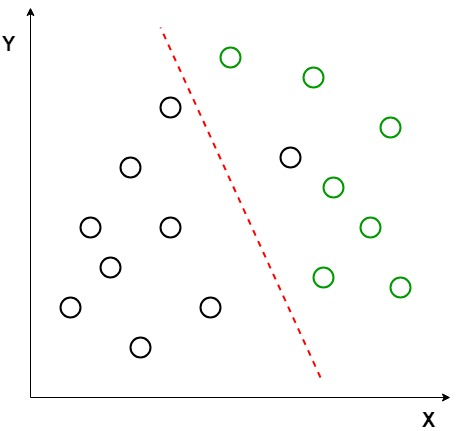

_Here, Linear Discriminant Analysis uses both the axes (X and Y) to create a new axis and projects data onto a new axis in a way to maximize the separation of the two categories and hence, reducing the 2D graph into a 1D graph._

_Two criteria are used by LDA to create a new axis:_

* _Maximize the distance between means of the two classes._
* _Minimize the variation within each class._

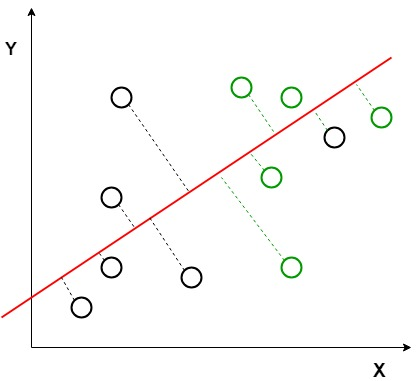

_In the above graph, it can be seen that a new axis (in red) is generated and plotted in the 2D graph such that it maximizes the distance between the means of the two classes and minimizes the variation within each class. In simple terms, this newly generated axis increases the separation between the data points of the two classes. After generating this new axis using the above-mentioned criteria, all the data points of the classes are plotted on this new axis and are shown in the figure given below._

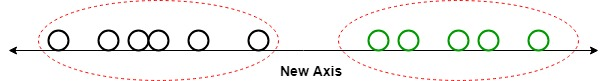

_But Linear Discriminant Analysis fails when the mean of the distributions are shared, as it becomes impossible for LDA to find a new axis that makes both the classes linearly separable. In such cases, we use non-linear discriminant analysis._

_Extensions to LDA:_

* ___Quadratic Discriminant Analysis (QDA):___ _Each class uses its own estimate of variance (or covariance when there are multiple input variables)._
* ___Flexible Discriminant Analysis (FDA):___ _Where non-linear combinations of inputs is used such as splines._
* ___Regularized Discriminant Analysis (RDA):___ _Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA._

___How does LDA work?___

_LDA focuses primarily on projecting the features in higher dimension space to lower dimensions. You can achieve this in three steps:_

_Firstly, you need to calculate the separability between classes which is the distance between the mean of different classes. This is called the between-class variance._
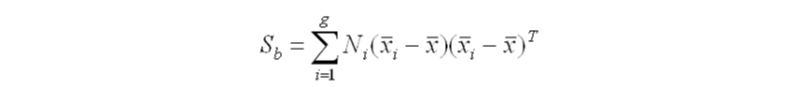

_Secondly, calculate the distance between the mean and sample of each class. It is also called the within-class variance._
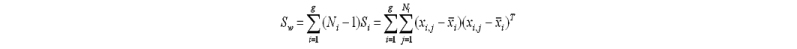

_Finally, construct the lower-dimensional space which maximizes the between-class variance and minimizes the within-class variance. P is considered as the lower-dimensional space projection, also called Fisher’s criterion._
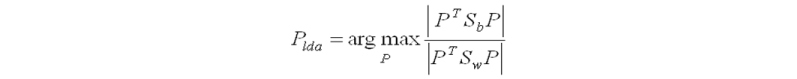

___How to prepare data from LDA?___

* _LDA is mainly used in classification problems where you have a categorical output variable. It allows both binary classification and multi-class classification._
* _The standard LDA model makes use of the Gaussian Distribution of the input variables. You should check the univariate distributions of each attribute and transform them into a more Gaussian-looking distribution. For example, for the exponential distribution, use log and root function and for skewed distributions use BoxCox._
* _Outliers can skew the primitive statistics used to separate classes in LDA, so it is preferable to remove them._
* _Since LDA assumes that each input variable has the same variance, it is always better to standardize your data before using an LDA model. Keep the mean to be 0 and the standard deviation to be 1._

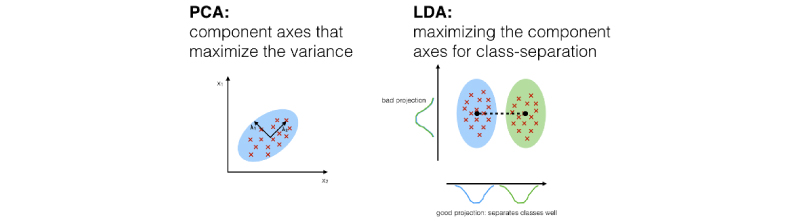

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
X = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
y = cancer['target']
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [13]:
# Applying PLDA function on training 
# and testing set of X component 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
  
lda = LDA(n_components = 1) # always equal to target classes - 1
lda.fit(X_train, y_train) # always takes into account the target varibale (supervised learning)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
X_train_lda = lda.transform(X_train) 
X_test_lda = lda.transform(X_test) 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [17]:
%time run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy:  0.956140350877193
Wall time: 564 ms


___References and Other Links:___

_https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning_

_https://www.youtube.com/watch?v=azXCzI57Yfc_